# Linear

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [TFP shock](#toc2_)    
- 3. [Government spending shock](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from FullHANKSAMModel import FullHANKSAMModelClass
from figures import create_fig, save_fig

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = FullHANKSAMModelClass(name='baseline')
model.load()

In [3]:
model.find_ss(calib_beta=False)

In [4]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs


curly_Y and curly_D calculated for RealR_ex_post   in 7.2 secs


curly_Y and curly_D calculated for delta           in 7.1 secs


curly_Y and curly_D calculated for hh_div          in 7.2 secs


curly_Y and curly_D calculated for hh_transfer     in 7.1 secs


curly_Y and curly_D calculated for lambda_u_s      in 7.2 secs


curly_Y and curly_D calculated for phi_obar        in 7.1 secs


curly_Y and curly_D calculated for shock_beta      in 7.1 secs


curly_Y and curly_D calculated for tau             in 7.1 secs


curly_Y and curly_D calculated for u_bar           in 7.2 secs


curly_Y and curly_D calculated for w               in 7.1 secs


curly_E calculated in 3.1 secs


builiding blocks combined in 0.9 secs
household Jacobian computed in 1.0 mins 15 secs

full Jacobians:


full Jacobian to unknowns computed in 43.7 secs [in evaluate_blocks(): 38.4 secs]


full Jacobian to shocks computed in 10.2 secs [in evaluate_blocks(): 4.9 secs]


## 2. <a id='toc2_'></a>[TFP shock](#toc0_)

linear transition path found in 1.0 secs [finding solution matrix: 1.0 secs]


scale = -0.010000: var_u = 0.87, var_u/scale**2 = 8718.36


scale = -0.005000: var_u = 0.20, var_u/scale**2 = 8144.52


scale = -0.001000: var_u = 0.01, var_u/scale**2 = 7699.81


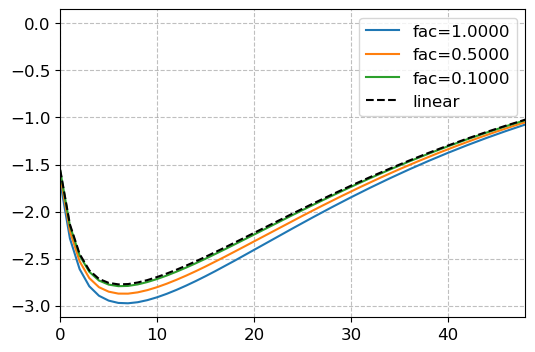

In [5]:
# a. linear
model.find_IRFs(do_print=True,shocks=['shock_TFP'])

# b. non-linear
fig,ax = create_fig()
for fac in [1.0,0.5,0.1]:

    model_ = model.copy()
    model_.par.jump_shock_TFP *= fac
    model_.find_transition_path(do_print=False,shocks=['shock_TFP'])
    model_.calc_moms_path()

    scale = model_.path.shock_TFP[0,0]/model_.ss.shock_TFP-1
    var_u = model_.moms['var_u']
    print(f'{scale = :2f}: {var_u = :.2f}, {var_u/scale**2 = :.2f}')

    IRF = model_.path.u/model.ss.u-1
    ax.plot(IRF/scale,label=f'fac={fac:.4f}')

IRF = (model.IRF['u']+model.ss.u)/model.ss.u-1
scale = (model.IRF['shock_TFP'][0]+model.ss.shock_TFP)/model.ss.shock_TFP-1
ax.plot(IRF/scale,color='black',ls='--',label='linear')
ax.legend(frameon=True)
ax.set_xlim([0,48]);

## 3. <a id='toc3_'></a>[Government spending shock](#toc0_)

In [6]:
model.par.jump_G = 0.01*model.ss.G
model.par.rho_G = 0.965

linear transition path found in 0.9 secs [finding solution matrix: 0.9 secs]


scale = 0.010000: var_u = 0.13, var_u/scale**2 = 1250.92


scale = 0.005000: var_u = 0.03, var_u/scale**2 = 1305.38


scale = 0.001000: var_u = 0.00, var_u/scale**2 = 1352.50


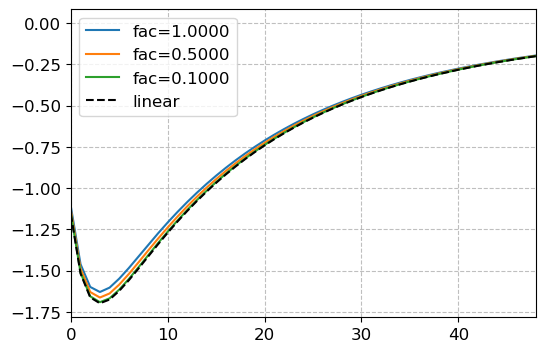

In [7]:
# a. shocks
par = model.par

# b. linear
model.find_IRFs(do_print=True,shocks=['G'])

# c. non-linear
fig,ax = create_fig()
for fac in [1.0,0.5,0.1]:

    model_ = model.copy()

    model_.par.jump_G *= fac    
    model_.find_transition_path(do_print=False,shocks=['G'])
    model_.calc_moms_path()

    scale = model_.path.G[0,0]/model_.ss.G-1
    var_u = model_.moms['var_u']
    print(f'{scale = :2f}: {var_u = :.2f}, {var_u/scale**2 = :.2f}')

    IRF = model_.path.u/model.ss.u-1
    ax.plot(IRF/scale,label=f'fac={fac:.4f}')

IRF = (model.IRF['u']+model.ss.u)/model.ss.u-1
scale = (model.IRF['G'][0]+model.ss.G)/model.ss.G-1
ax.plot(IRF/scale,color='black',ls='--',label='linear')
ax.legend(frameon=True); 
ax.set_xlim([0,48]);